### Imports


In [146]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

comp='bf1'
import sys  # update paths
sys.path.append('../../')

import os 
import numpy as np 
import matplotlib.pyplot as plt
import copy
import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls
import seaborn as sns
import scipy.constants as cs
from scipy.optimize import curve_fit

colors = ['#4053d3', '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'

# samples: no hf, hf, scalinq (0729-2 is hf3)
# meas: 240725, 240719, 240729, 240729-2, 240814-2

sample ='hf-soc'
meas = '240729-4'

# sample='hf'
# meas = '240729-3'

#sample = 'scalinq'
#meas = '240814-2'

if sample=='no hf':
    flip = False
    pth = '240725/'
    params = {'atten': -40, 'min_power': -100, 'max_power': -15}
elif sample=='hf':
    flip = True
    pth = '240729/'
    params = {'atten':-50, 'min_power': -100, 'max_power': -25}
elif sample=='hf-soc':
    flip=True
    pth = '240818-Resonator/'
    params = {'atten':-50, 'min_power': -100, 'max_power': 25}
elif sample=='scalinq':
    flip = False
    pth = '240814-Resonator/'
    params = {'atten':-65, 'min_power': -100, 'max_power': -15}    
else:
    print('Sample not found')

data_pth = pth_base+folder+'Data/'+pth
params['temp'] = 0.04
params['res_name']=meas
params['sample']=sample
if flip: 
    params['pitch'] = [10, 12, 14, 2, 16, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 7, 6.7, 7.2, 7.5, 7.9]
else: 
    params['pitch'] = [10, 12, 14, 16, 2, 4, 6, 8]
    params['target_freq'] =[5.9, 6.2, 6.5, 6.7, 7, 7.2, 7.5, 7.9]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sweep power/temp, plot results

### Run sweep 

Counter({6423: 13, 6723: 13})
Counter({6423: 13, 6723: 13})
['res_6423_65536_wideleft', 'res_6423_32768_wideleft', 'res_6423_16384_wideleft', 'res_6423_8192_wideleft', 'res_6423_4096_wideleft', 'res_6423_2048_wideleft', 'res_6423_1024_wideleft', 'res_6423_512_wideleft', 'res_6423_256_wideleft', 'res_6423_128_wideleft', 'res_6423_64_wideleft', 'res_6423_32_wideleft', 'res_6423_16_wideleft']
2.0


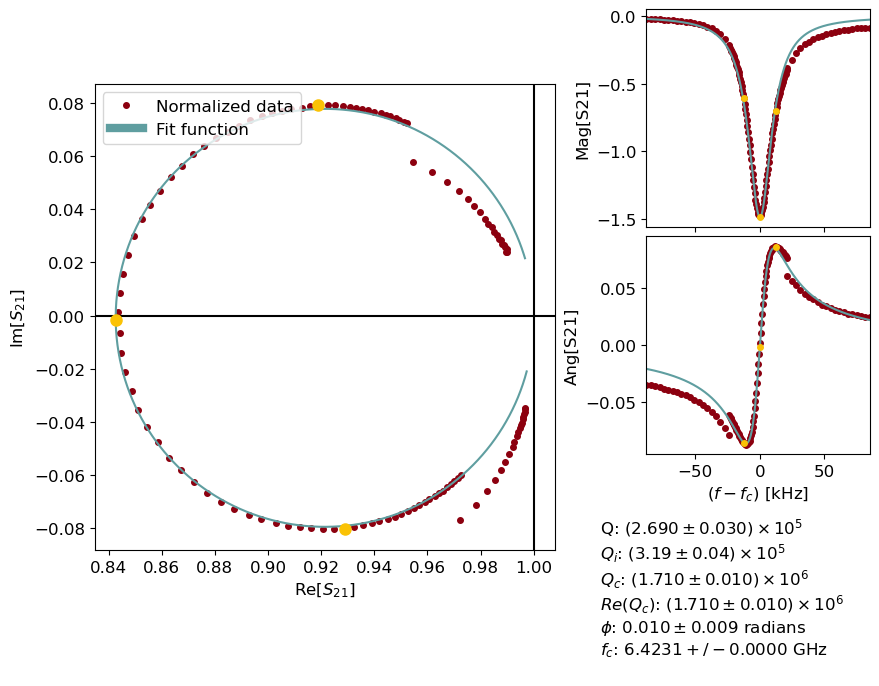

1.0


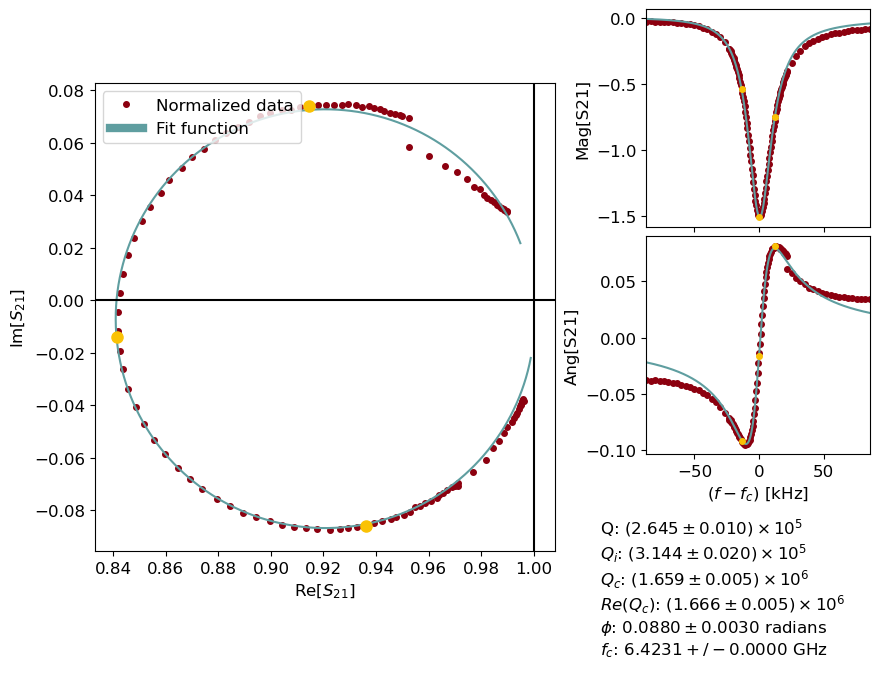

0.5


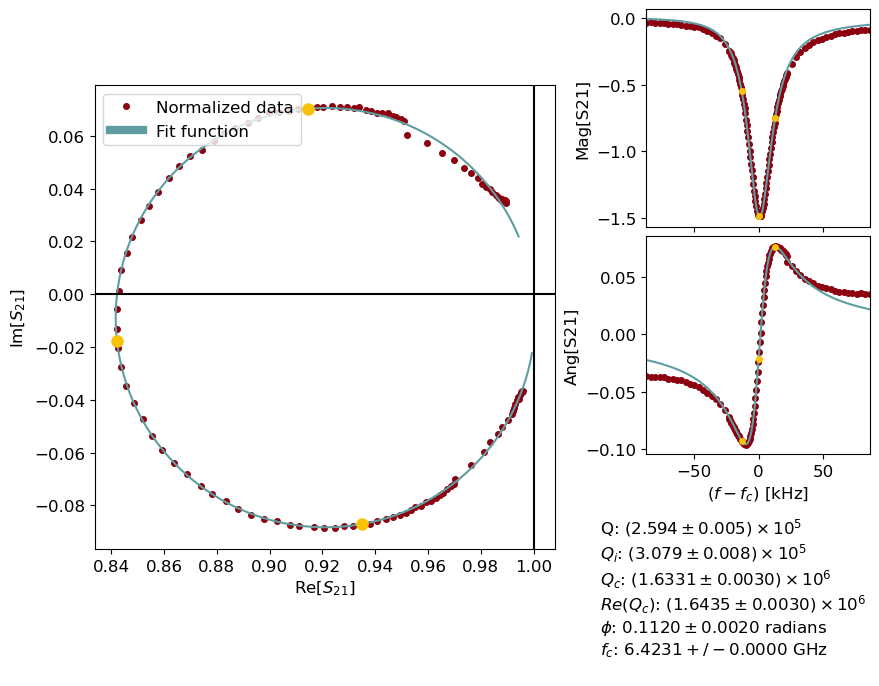

0.25


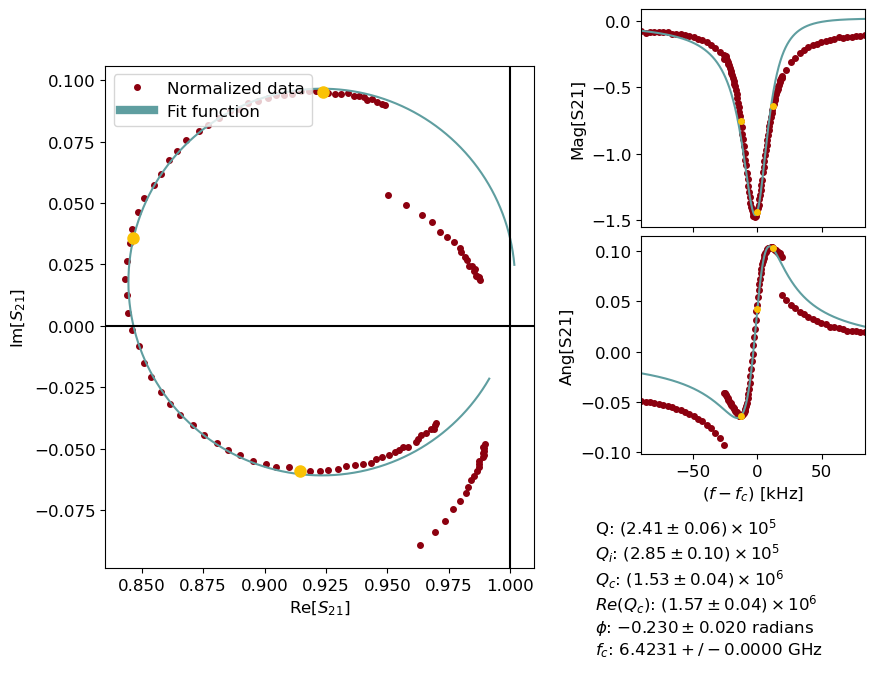

0.125


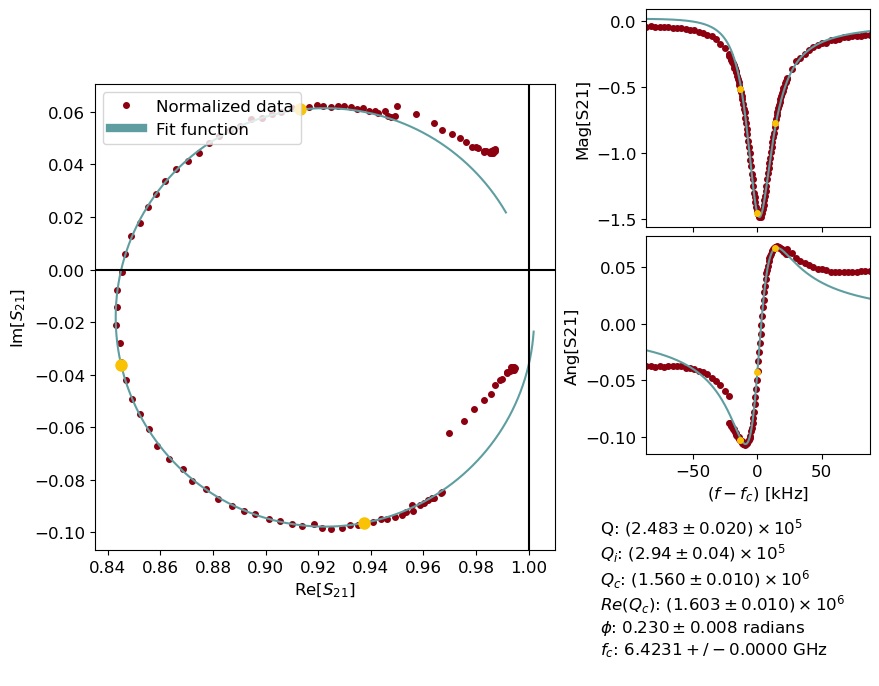

0.0625


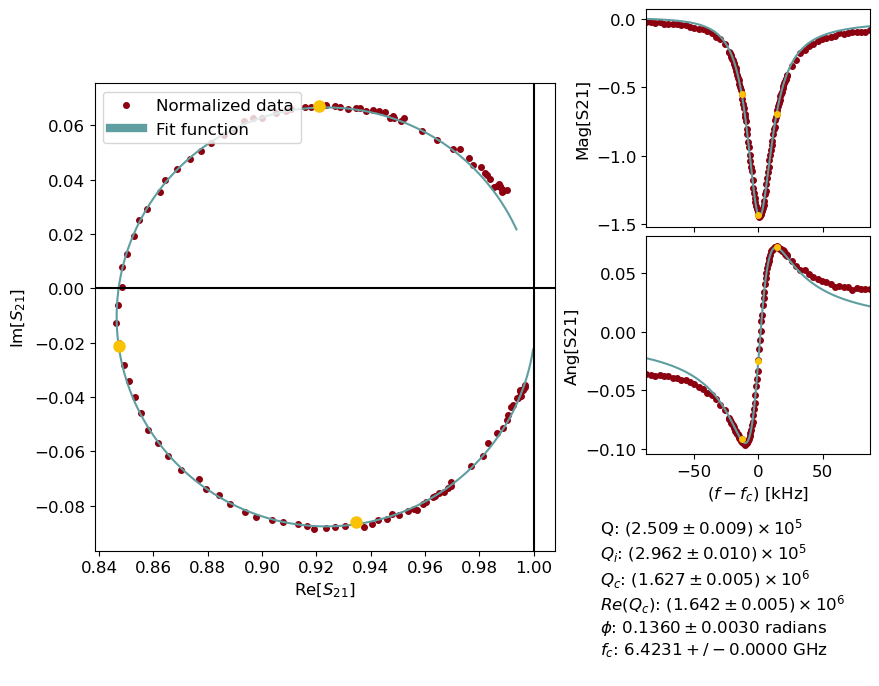

0.03125


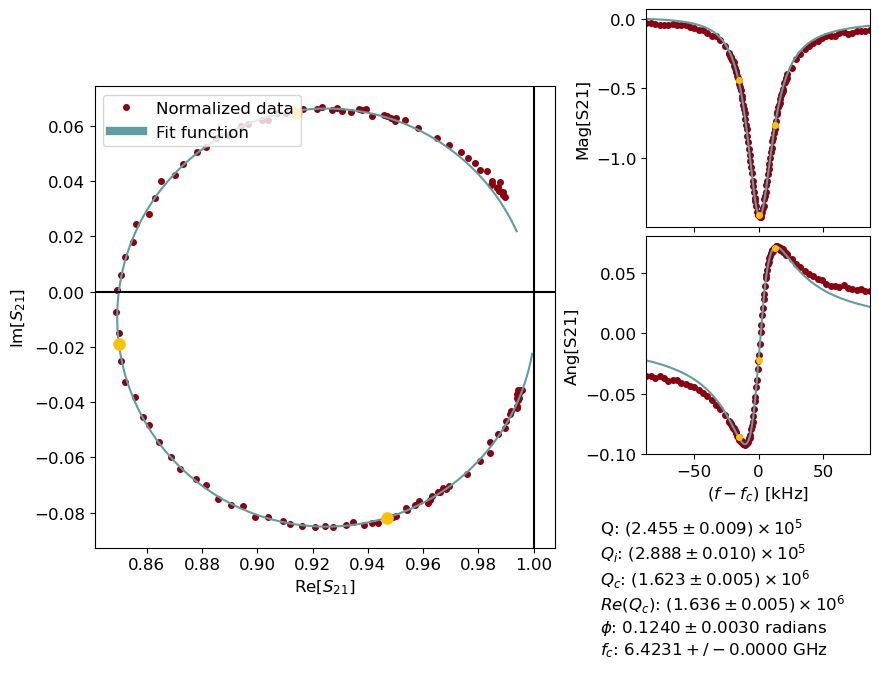

0.015625


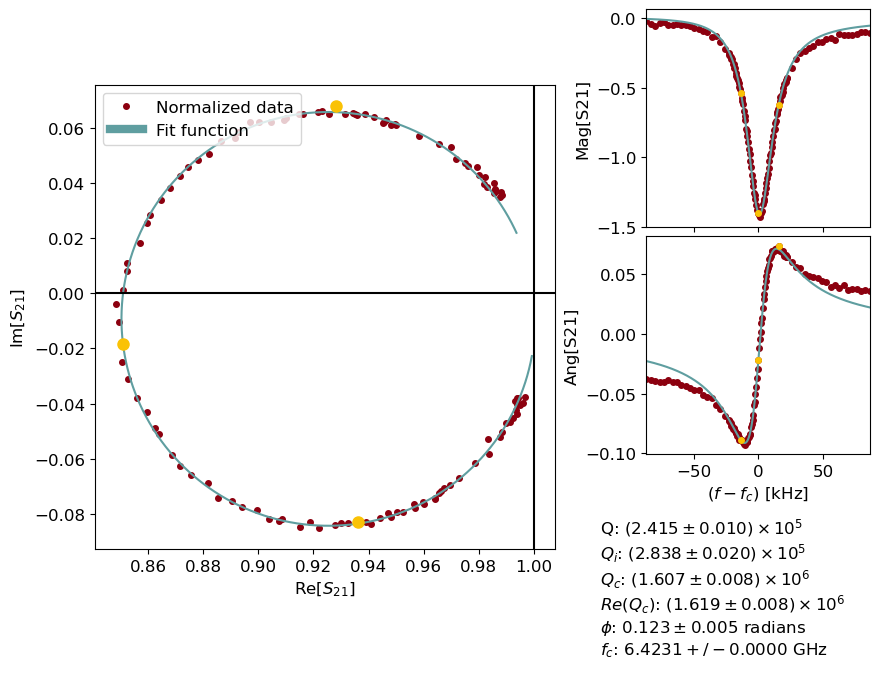

0.0078125


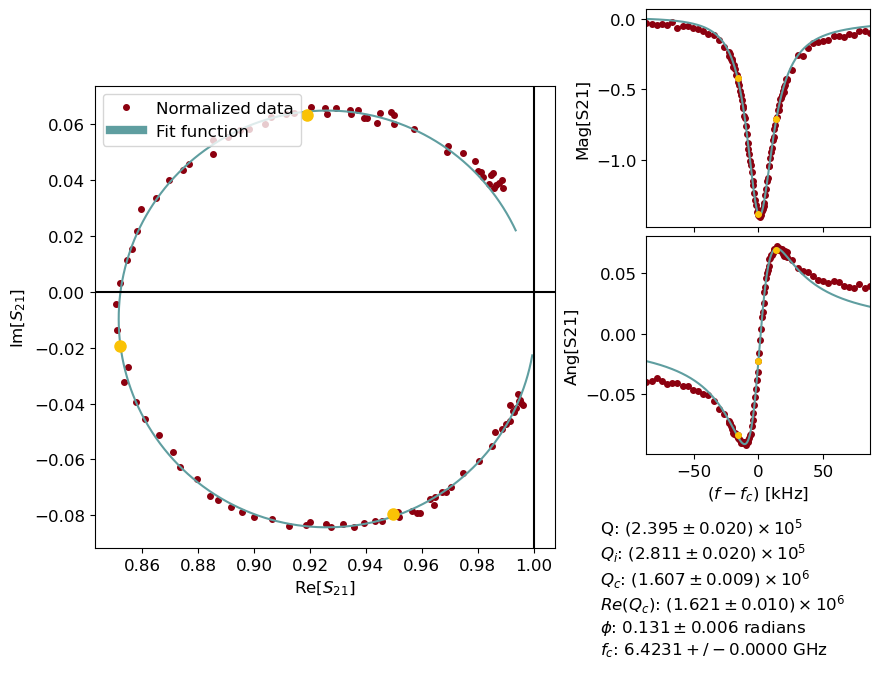

0.00390625


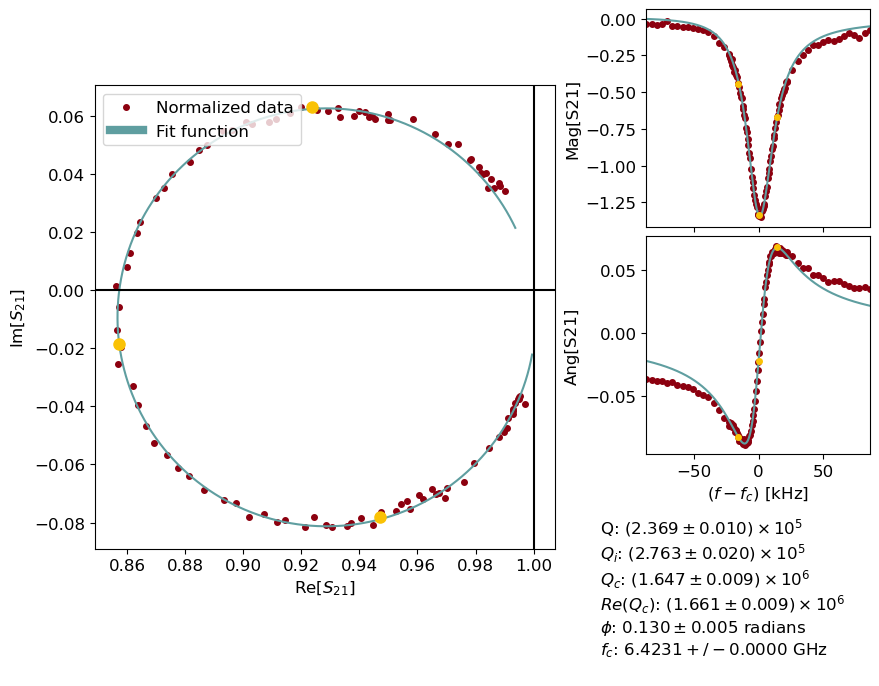

0.001953125


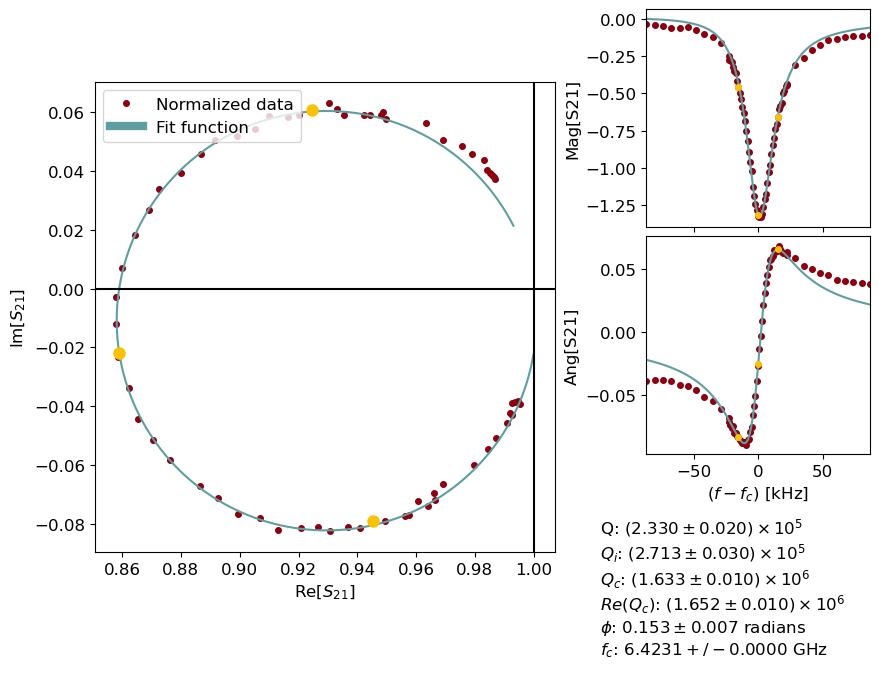

0.0009765625


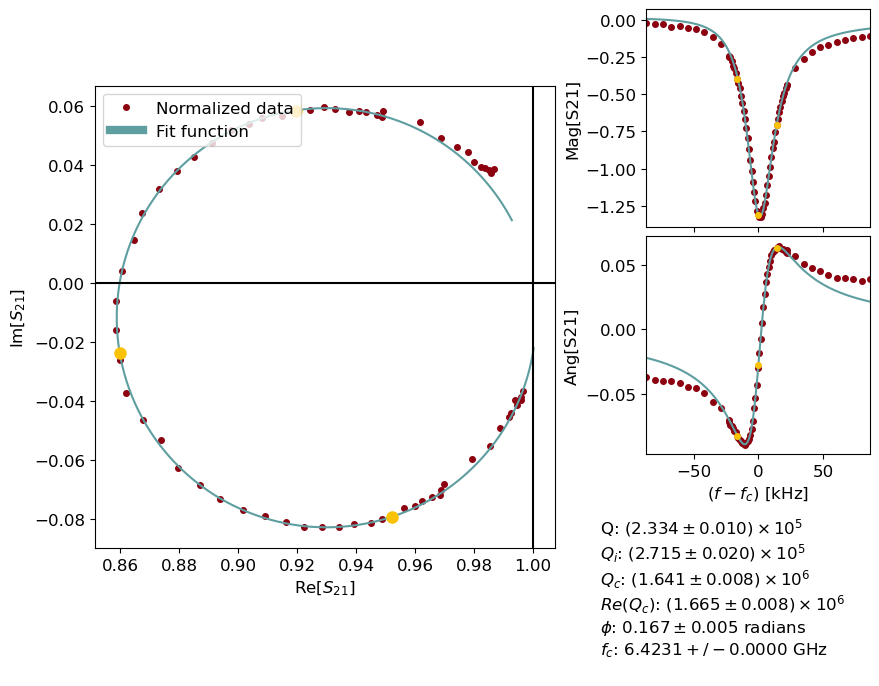

0.00048828125


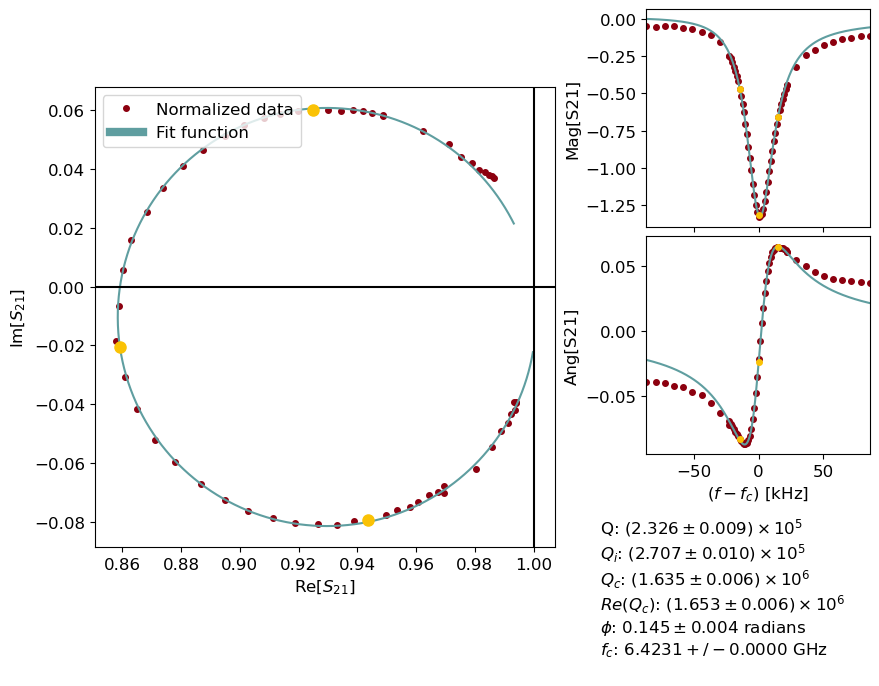

Time elapsed:  11.410129070281982
['res_6723_65536_wideleft', 'res_6723_32768_wideleft', 'res_6723_16384_wideleft', 'res_6723_8192_wideleft', 'res_6723_4096_wideleft', 'res_6723_2048_wideleft', 'res_6723_1024_wideleft', 'res_6723_512_wideleft', 'res_6723_256_wideleft', 'res_6723_128_wideleft', 'res_6723_64_wideleft', 'res_6723_32_wideleft', 'res_6723_16_wideleft']
2.0


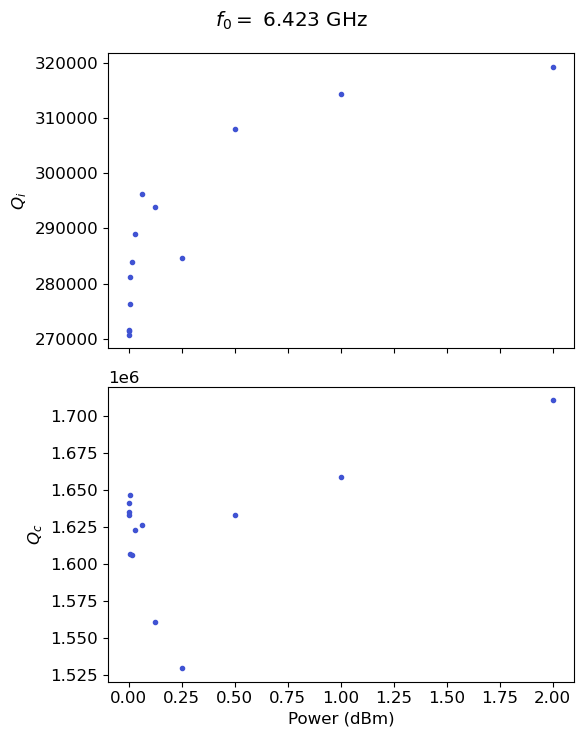

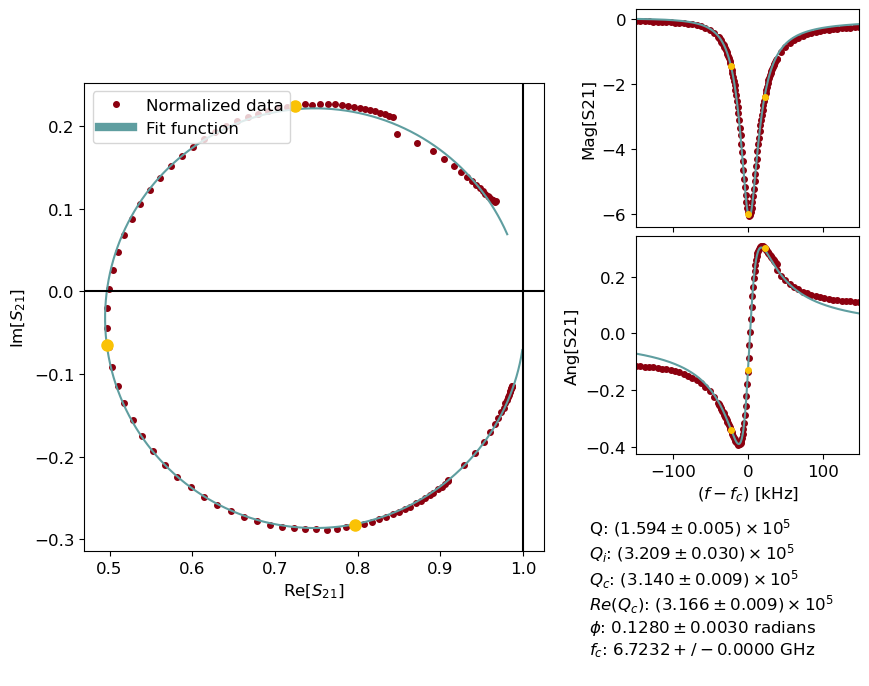

1.0


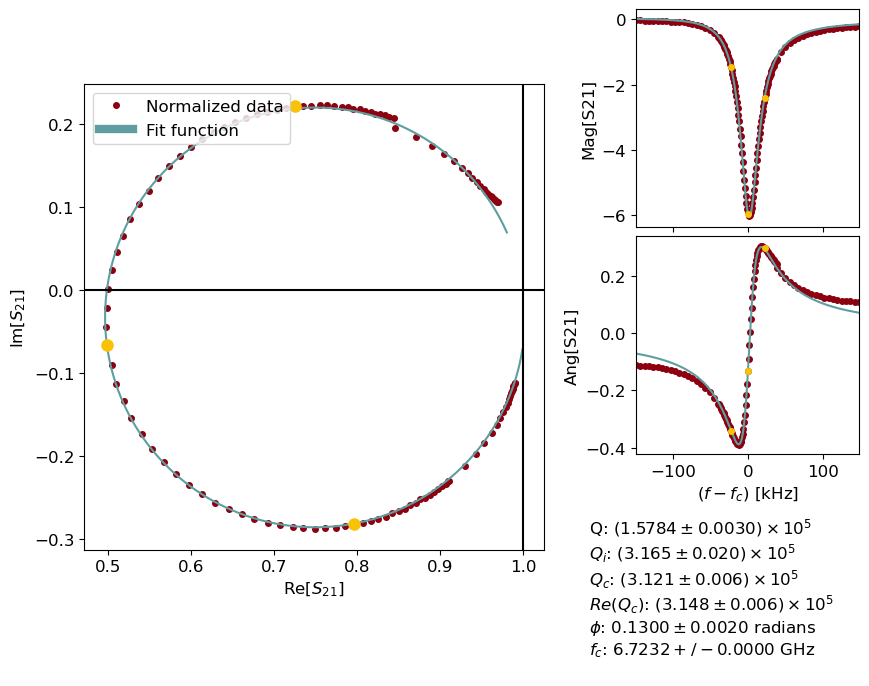

0.5


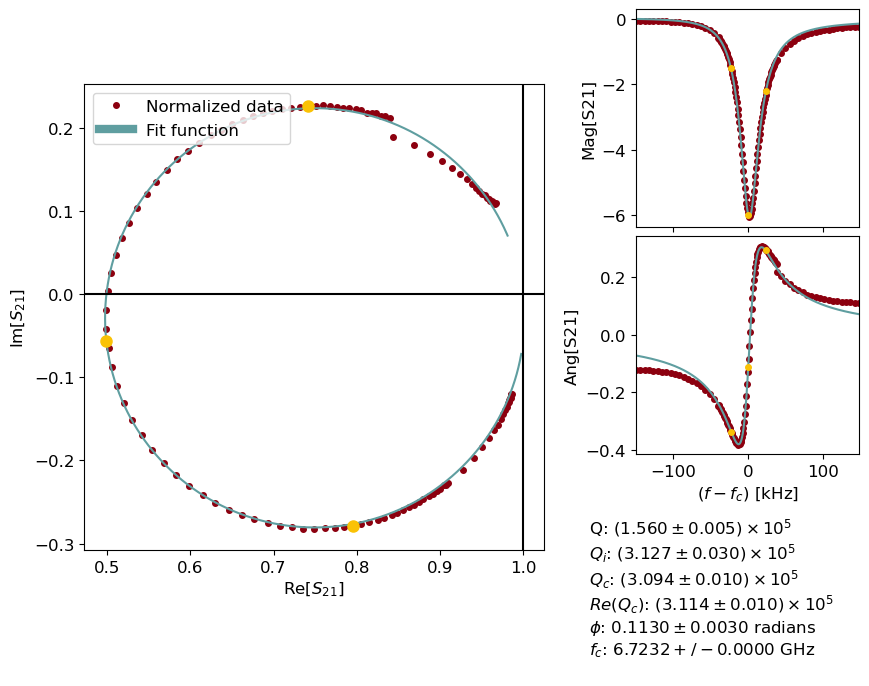

0.25


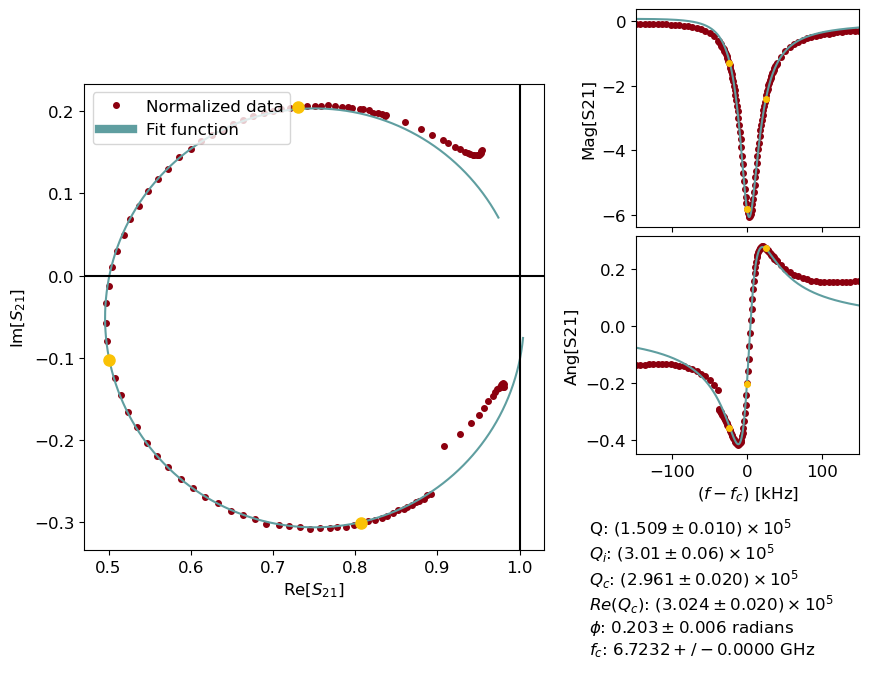

0.125


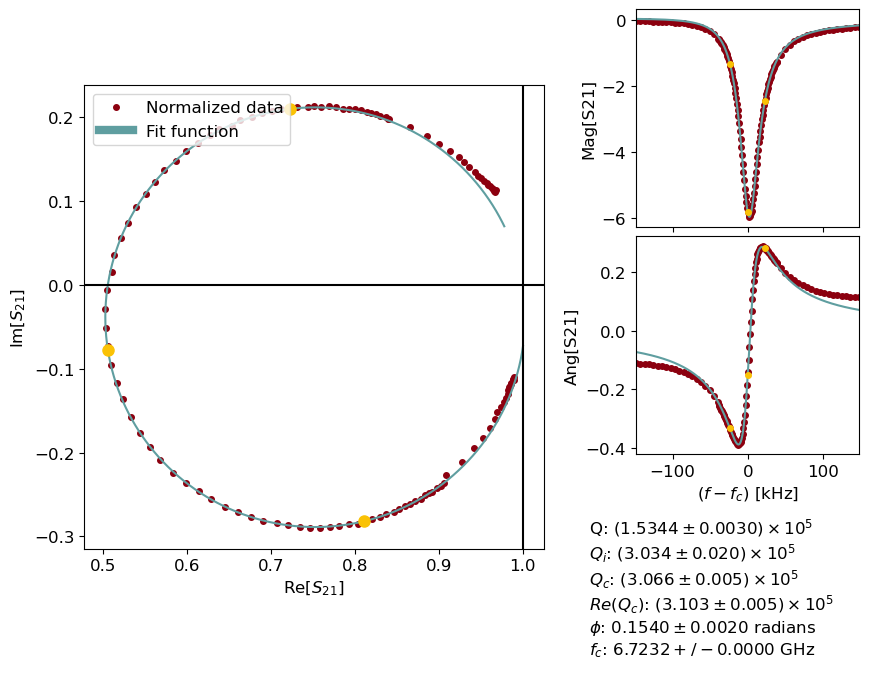

0.0625


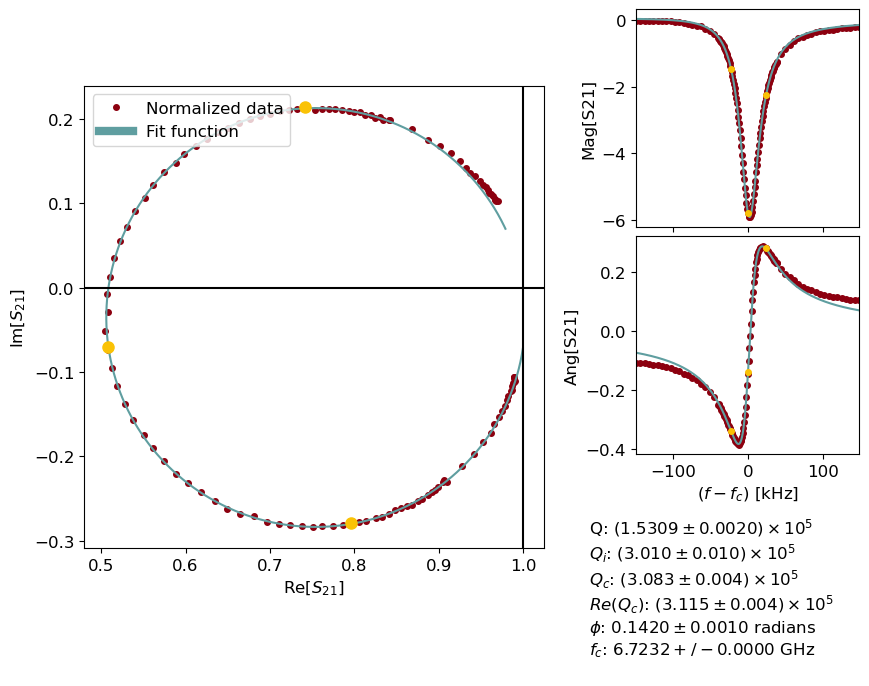

0.03125


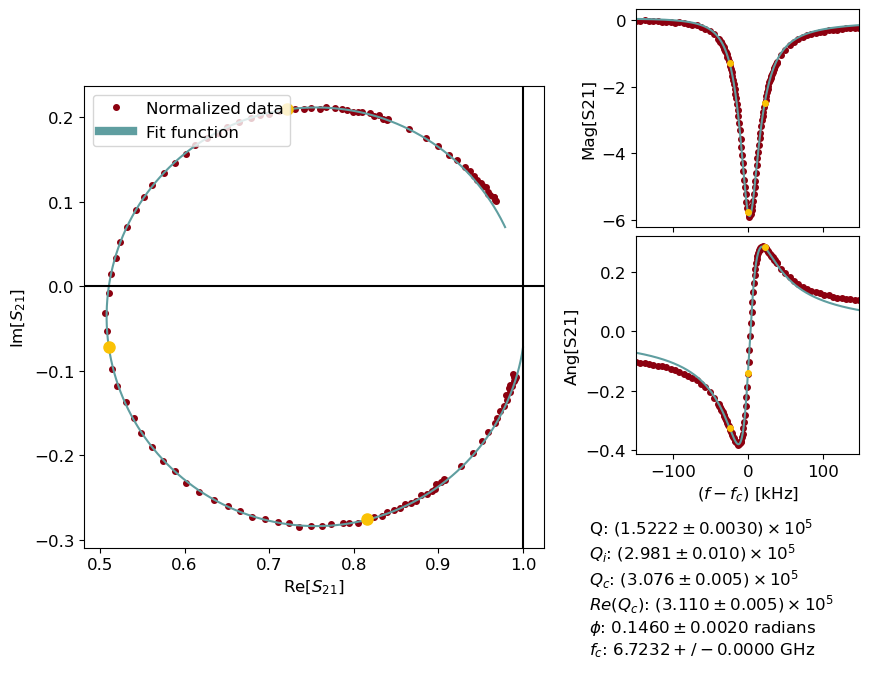

0.015625


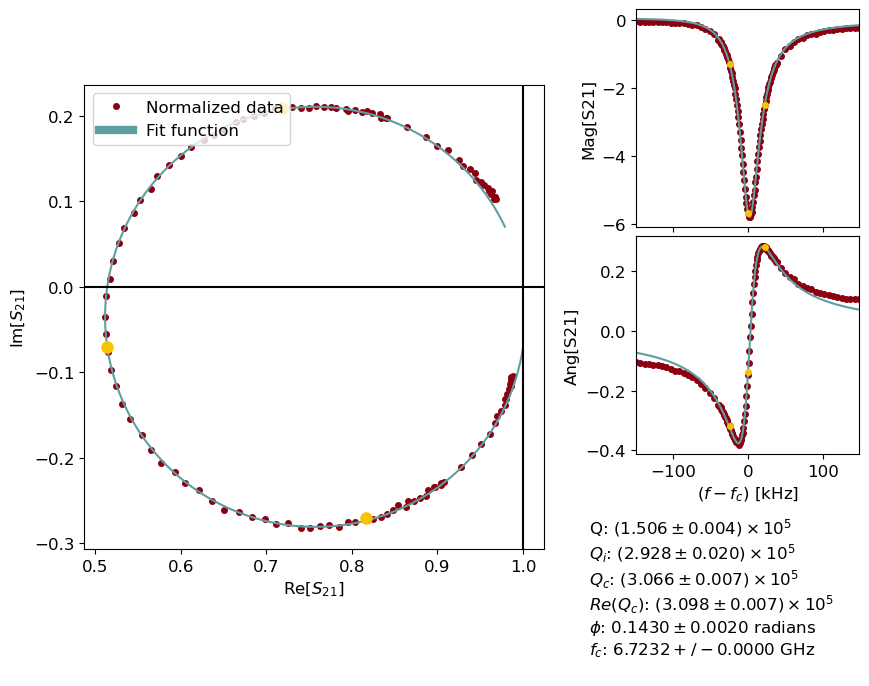

0.0078125


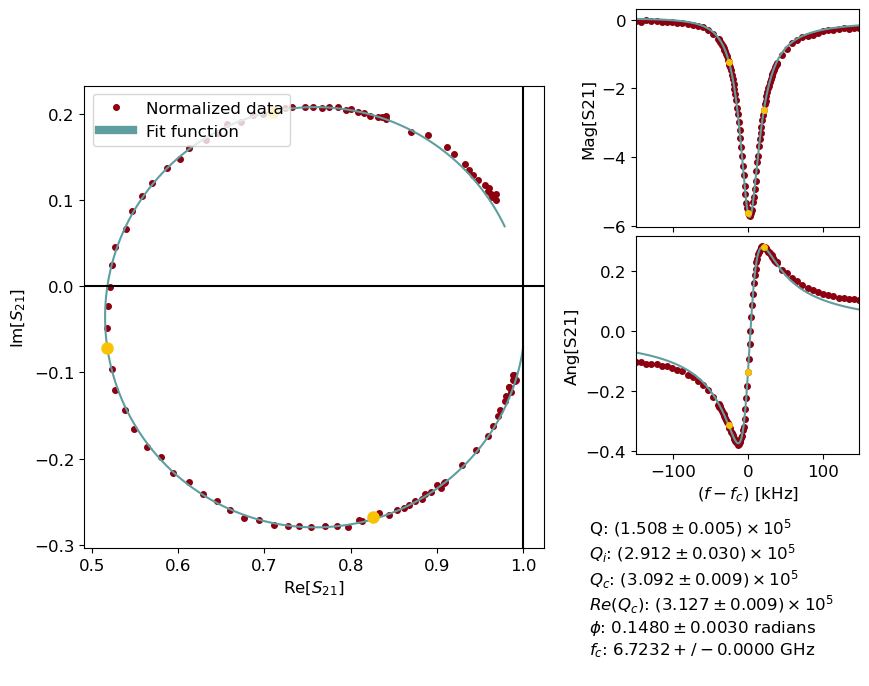

0.00390625


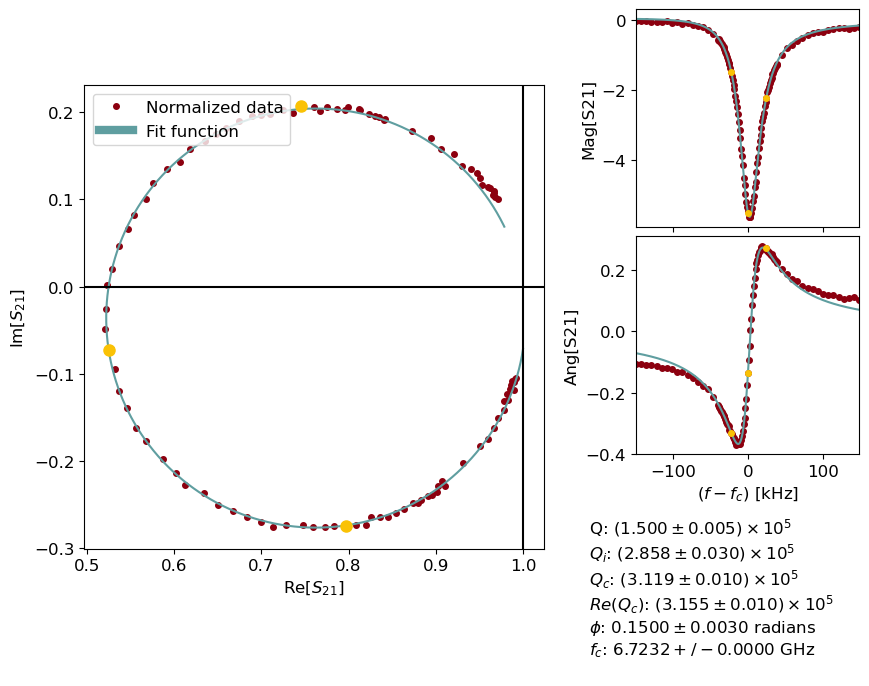

0.001953125


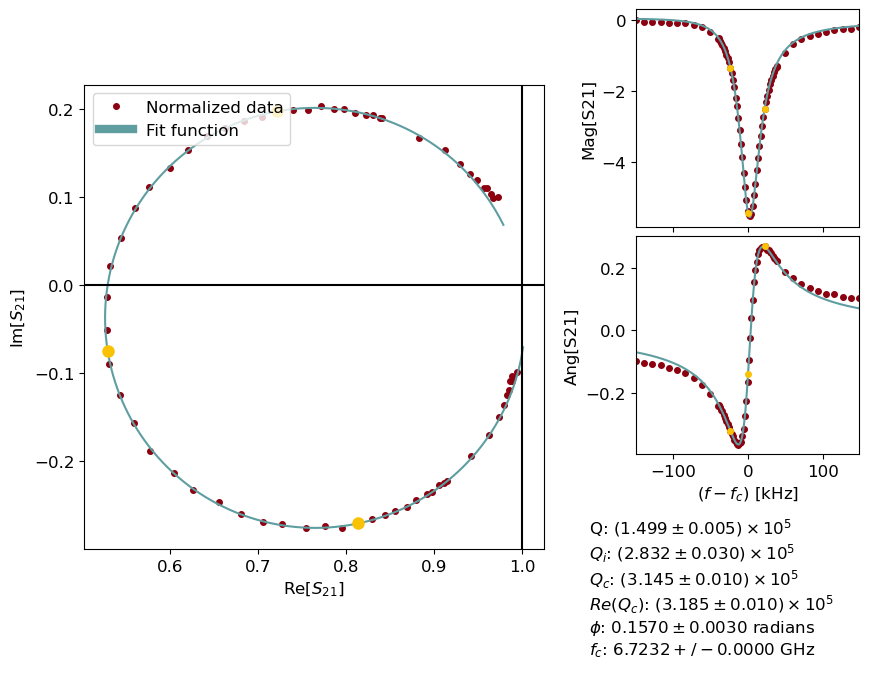

0.0009765625


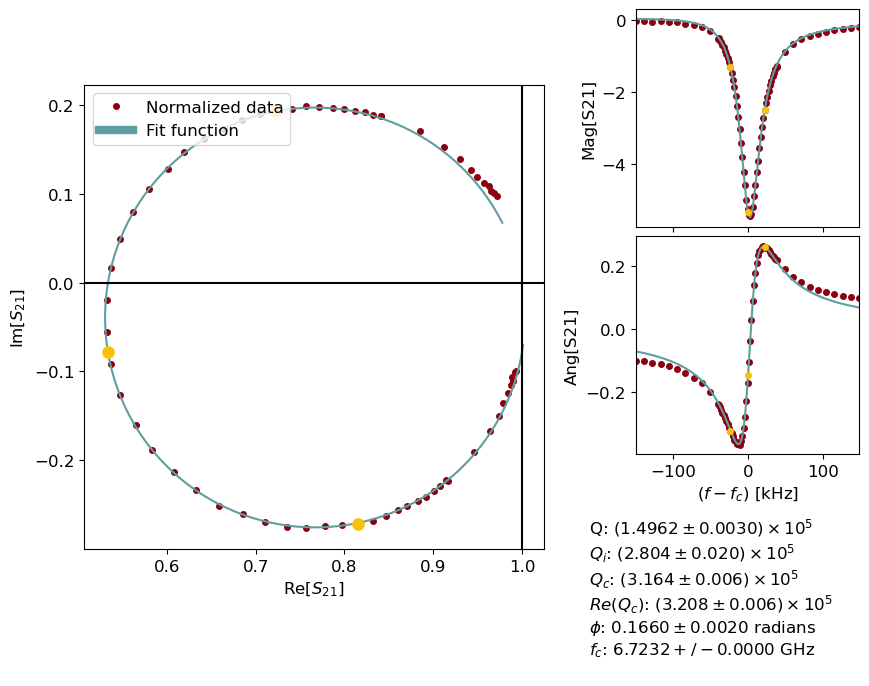

0.00048828125


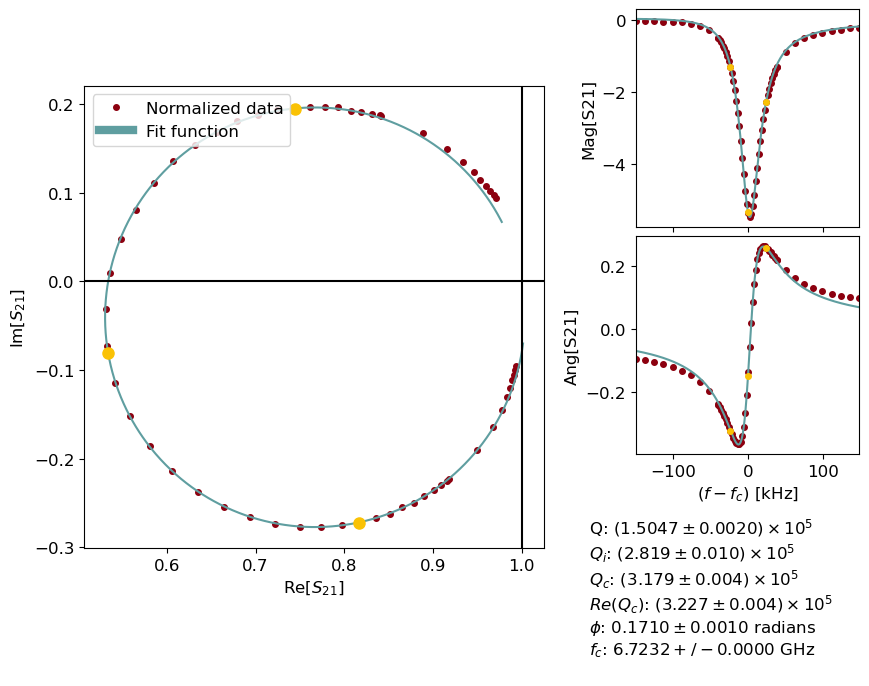

Time elapsed:  23.01470398902893


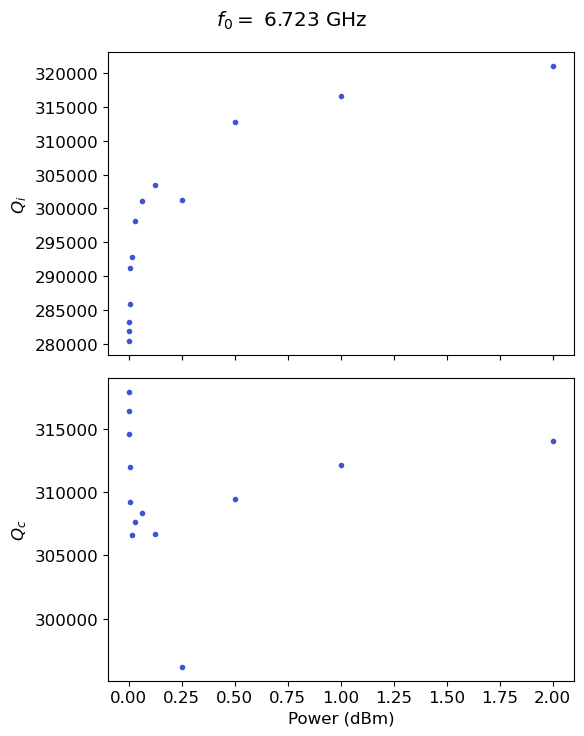

In [147]:
nfiles=3
meas_type='vna'
if params['res_name']=='240725':
    directories = ['power_sweep7']
    res_params = ana_res.analyze_sweep_double(directories, data_pth)
    nfiles = 2
elif params['res_name']=='240719':
    params['min_power']=-85
    directories = ['sample1_power_sweep_2']
    res_param = ana_res.analyze_sweep(directories, data_pth)
    nfiles = 1
elif params['res_name']=='240729':
    directories = ['power_sweep2']
    params['max_power'] = -30
    res_params = ana_res.analyze_sweep_double(directories, data_pth,img_pth=img_pth+'Images/')    
    nfiles = 2
elif params['res_name']=='240729-2':
    directories = ['power_sweep5']
    # there is an issue with power sweep 5 for the 6 um data 
    res_params = ana_res.analyze_sweep_triple(directories, data_pth, img_pth=img_pth+'Images/',name=params['res_name'], plot=False)
elif params['res_name']=='240729-3':
    directories = ['power_sweep4']
    # there is an issue with power sweep 5 for the 6 um data 
    res_params = ana_res.analyze_sweep_triple(directories, data_pth, img_pth=img_pth+'Images/',name=params['res_name'], plot=True)
elif params['res_name']=='240814-2':
    directories = ['powersweep7']
    res_params = ana_res.analyze_sweep_triple(directories, data_pth, img_pth=img_pth+'Images/', name=params['res_name'], plot=False)
    #res_params = ana_res.analyze_sweep(directories, pth, name=params['res_name'], plot=True)
elif params['res_name']=='240729-4':
    meas_type='soc'
    #slope = 23.45293930972242
    slope = 23.9
    directories=['powersweep4']
    res_params = ana_res.analyze_sweep_triple(directories, data_pth, name='rfsoc', img_pth=img_pth+'Images/', plot=True, type=meas_type, slope=slope)
else:
    print('Sample not found')

Counter({6423: 13, 6723: 13})
Counter({6423: 13, 6723: 13})
['res_6423_65536_wideleft', 'res_6423_32768_wideleft', 'res_6423_16384_wideleft', 'res_6423_8192_wideleft', 'res_6423_4096_wideleft', 'res_6423_2048_wideleft', 'res_6423_1024_wideleft', 'res_6423_512_wideleft', 'res_6423_256_wideleft', 'res_6423_128_wideleft', 'res_6423_64_wideleft', 'res_6423_32_wideleft', 'res_6423_16_wideleft']
['res_6723_65536_wideleft', 'res_6723_32768_wideleft', 'res_6723_16384_wideleft', 'res_6723_8192_wideleft', 'res_6723_4096_wideleft', 'res_6723_2048_wideleft', 'res_6723_1024_wideleft', 'res_6723_512_wideleft', 'res_6723_256_wideleft', 'res_6723_128_wideleft', 'res_6723_64_wideleft', 'res_6723_32_wideleft', 'res_6723_16_wideleft']


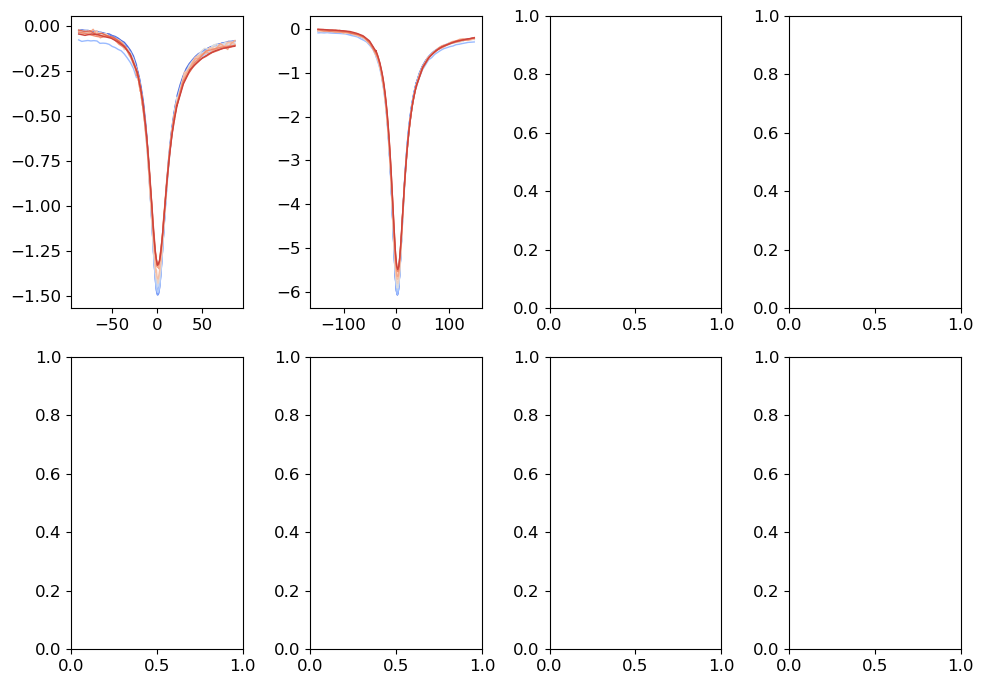

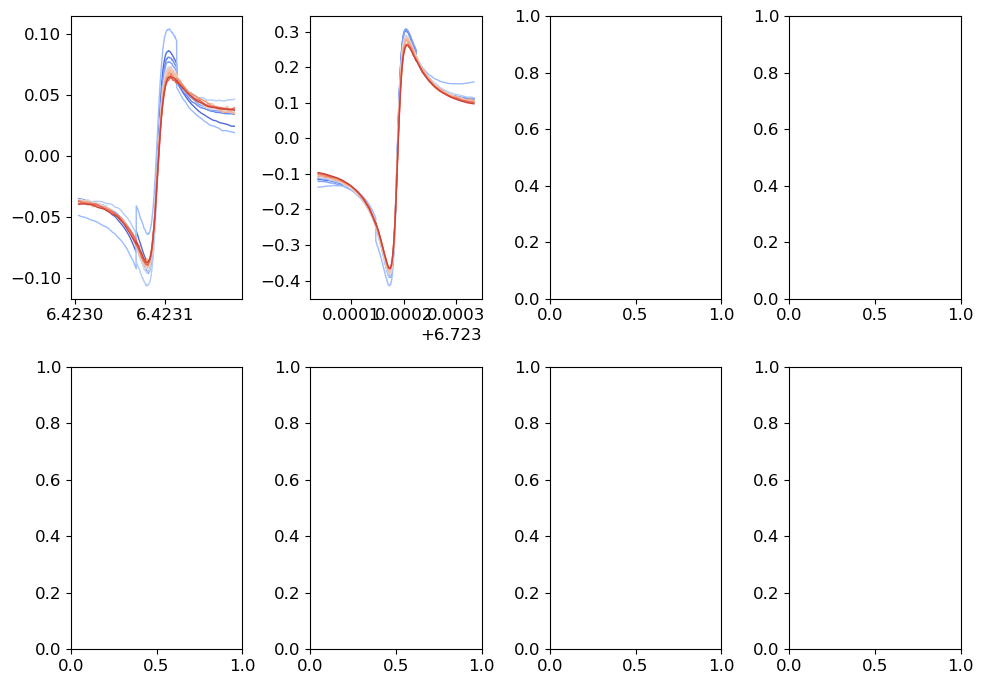

In [148]:
#slope = 0
ana_res.plot_all(directories, data_pth, output_path=img_pth, max_power=-15, norm=True, nfiles=nfiles, meas_type=meas_type, slope=slope)

#### Reorder the data based on pitch (only run once)

In [149]:

if meas_type=='soc':
    res_params = ana_res.convert_power(res_params) 

params, res_params=ana_res.reorder(params, res_params) # only run once!
params['qc'] = np.array([np.nanmedian(res_params[i]['qc']) for i in range(len(res_params))])
params['qc_err'] = np.array([np.nanmedian(res_params[i]['qc_err']) for i in range(len(res_params))])
params['freqs'] = np.array([np.nanmedian(res_params[i]['freqs']) for i in range(len(res_params))])
params['phs'] = np.array([np.nanmedian(res_params[i]['phs']) for i in range(len(res_params))])

### Power sweep and TLS fits

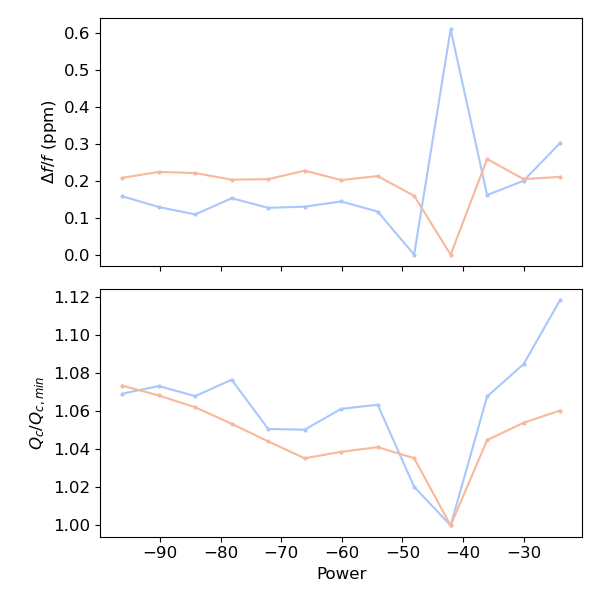

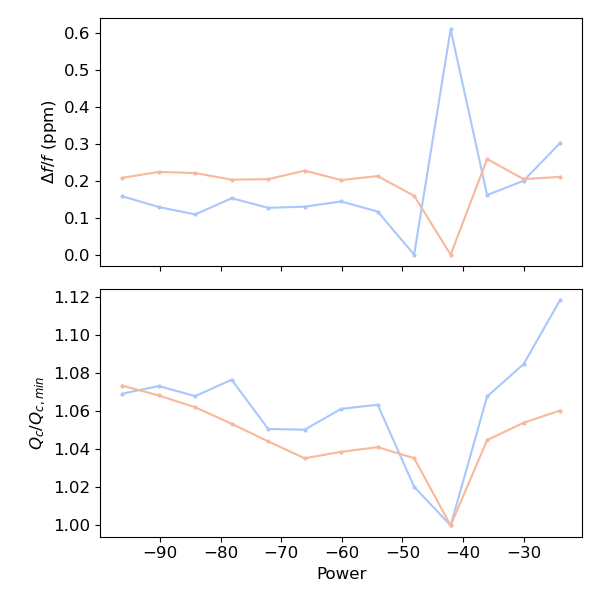

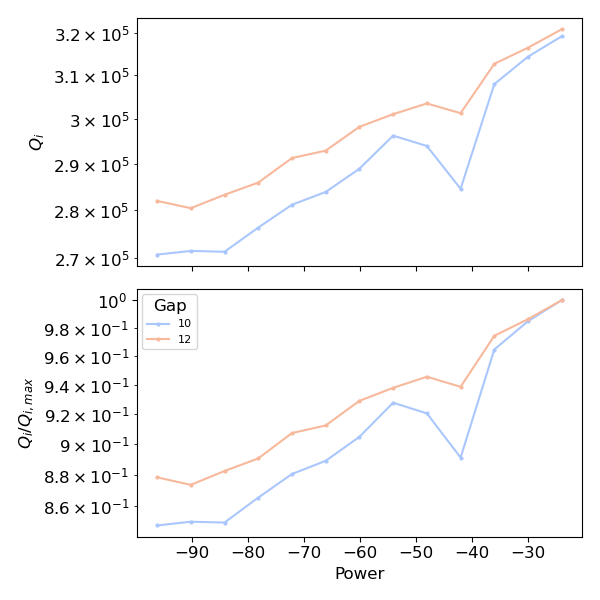

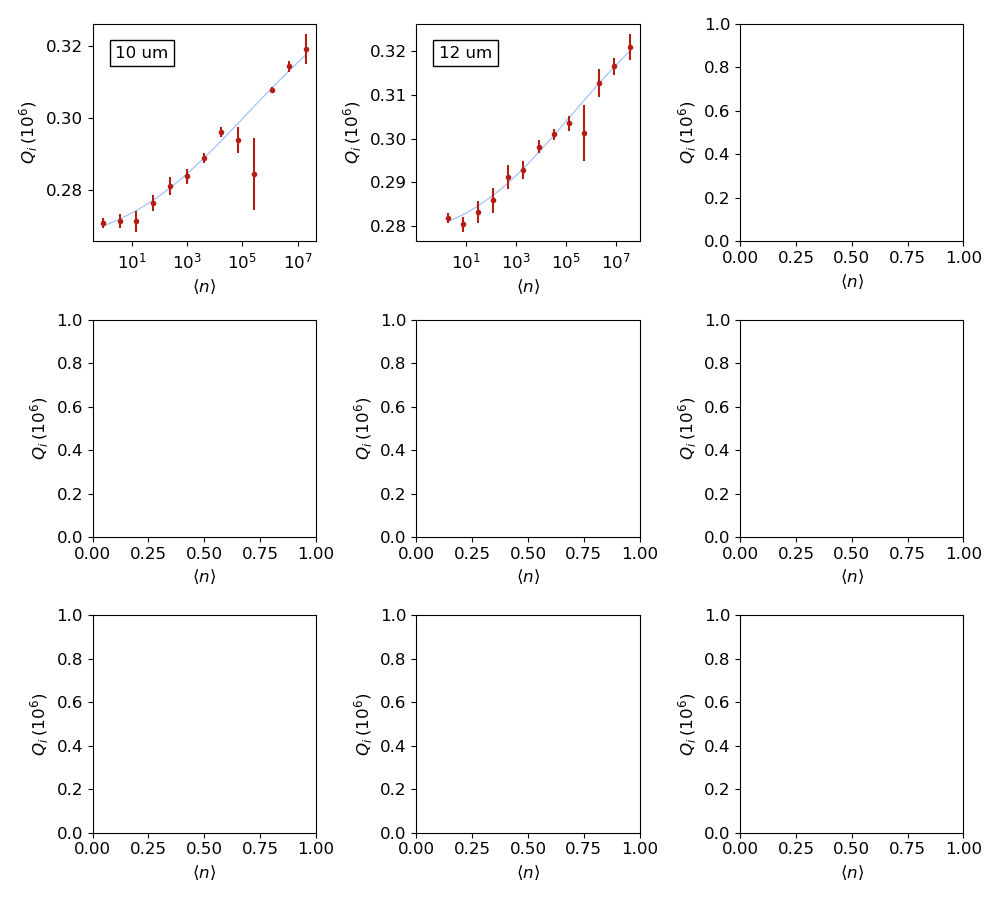

In [150]:
%matplotlib widget

ana_res.plot_power(res_params, params, img_pth, use_pitch=True)
cfg = ana_tls.fit_qi(res_params, params, img_pth) 
ana_tls.plot_res_pars([params], [''],img_pth)
ana_res.plot_res_pars([params], [''], img_pth)
hy.save_np(params, img_pth+'Text/' + params['res_name'] + '.yml')
# soc_res_params = np.load(img_pth + 'other_files/soc_power_sweep.npy', allow_pickle=True)
# soc_res_params = np.load(img_pth + 'other_files/soc_power_sweep.npy', allow_pickle=True)
# np.save(img_pth + 'other_files/soc_power_sweep' , np.array(res_params))
#np.save(img_pth + 'other_files/vna_power_sweep' , np.array(res_params))
#print(np.array(res_params)[0]['qi'])

{'freqs': array([[6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09,
        6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09,
        6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09, 6.7232e+09]]), 'phs': array([[0.174 , 0.1693, 0.1717, 0.1699, 0.1712, 0.172 , 0.1712, 0.1703,
        0.1726, 0.1708, 0.1729, 0.1741, 0.1808, 0.1934, 0.1838]]), 'q': array([[147055.4032, 147941.5565, 148838.9539, 149041.7508, 150260.2178,
        150926.4534, 151715.4653, 152463.875 , 153654.7951, 154439.0214,
        155352.7195, 156441.2176, 157773.3577, 159514.3399, 169813.7906]]), 'qi': array([[276823.5986, 279670.4825, 281731.7588, 283638.788 , 287028.9817,
        289505.5675, 292129.9073, 295336.2016, 298967.9204, 302227.0443,
        305199.1269, 308262.54  , 311012.4038, 312986.2545, 325806.39  ]]), 'qc': array([[308963.9625, 309602.9491, 310898.4796, 309553.9472, 310734.2364,
        310648.7306, 311026.5253, 310605.3764, 311431.8111, 311230.484 ,
        311693.8016, 312841.83

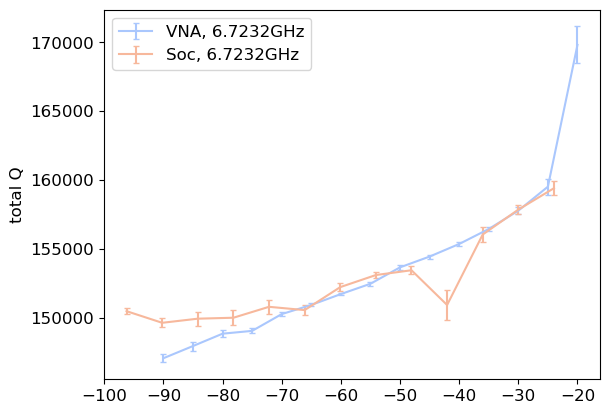

In [153]:
# plot the vna and soc curves in the same plot
soc_res_params = np.load(img_pth + 'other_files/soc_power_sweep.npy', allow_pickle=True)
vna_res_params = np.load(img_pth + 'other_files/vna_power_sweep.npy', allow_pickle=True)

#print(vna_res_params)
print(vna_res_params[7])

%matplotlib inline
plt.errorbar(vna_res_params[7]['pow'][0], vna_res_params[7]['q'][0], yerr =  vna_res_params[7]['q_err'][0], capsize=2, label = 'VNA, 6.7232GHz')
plt.errorbar(soc_res_params[1]['pow'][0], soc_res_params[1]['q'][0], yerr =  soc_res_params[1]['q_err'][0], capsize=2, label = 'Soc, 6.7232GHz')
plt.ylabel('total Q')
plt.legend()
plt.show()

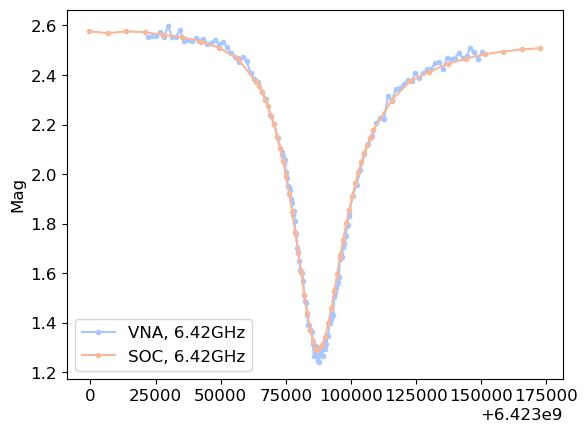

In [141]:
# plot resonator data
vna_wide_1, _ = ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240729/power_sweep4', fname = 'res_6423086_90dbm_wide1', meas_type='vna')
vna_wide_2, _ = ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240729/power_sweep4', fname = 'res_6423086_90dbm_wide2', meas_type='vna')
vna_narrow, _ = ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240729/power_sweep4', fname = 'res_6423086_90dbm_narrow', meas_type='vna')
vna_data = ana_res.combine_data( vna_narrow, ana_res.combine_data(vna_wide_1, vna_wide_2) )

slope_ = 23.9
soc_wide_1, _ =  ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240818-Resonator/powersweep4', fname = 'res_6423_16_wideleft', meas_type='soc',slope = slope_)
soc_wide_2, _ =  ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240818-Resonator/powersweep4', fname = 'res_6423_16_wideright', meas_type='soc',slope = slope_)
soc_narrow, _ =  ana_res.grab_data('G:/My Drive/Projects/Materials/Data/240818-Resonator/powersweep4', fname = 'res_6423_16_narrow', meas_type='soc',slope = slope_)
soc_data = ana_res.combine_data( soc_narrow, ana_res.combine_data(soc_wide_1, soc_wide_2) )

plt.plot(vna_data['freqs'], vna_data['amps'] - np.min(vna_data['amps']) + np.min(soc_data['amps'])-0.05, label = 'VNA, 6.42GHz', marker = '.' )
plt.plot(soc_data['freqs']-4000, soc_data['amps'], label = 'SOC, 6.42GHz', marker = '.' )
plt.ylabel('Mag')
plt.legend()

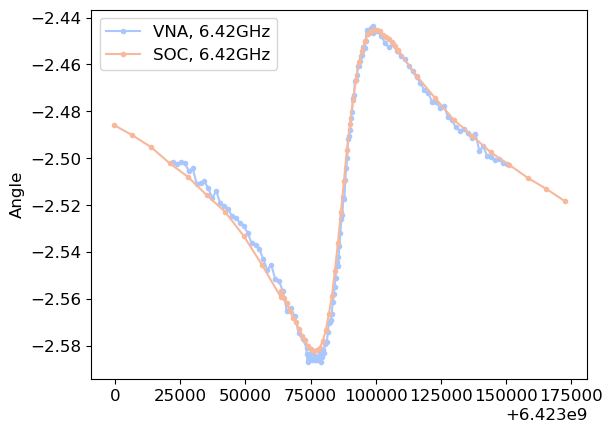

In [144]:
plt.plot(vna_data['freqs'], vna_data['phases']-0.005, label = 'VNA, 6.42GHz', marker = '.' )
# plt.plot(soc_data['freqs']-4000, soc_data['phases']+160000-2322.3, label = 'SOC, 6.72GHz', marker = '.' )
plt.plot(soc_data['freqs']-4000, soc_data['phases']+(np.min(vna_data['phases']) - np.min(soc_data['phases'])), label = 'SOC, 6.42GHz', marker = '.' )
plt.ylabel('Angle')
plt.legend()

In [117]:
print(vna_data.keys())

dict_keys(['freqs', 'amps', 'phases'])


### Plot with different max and min power for each resonator 

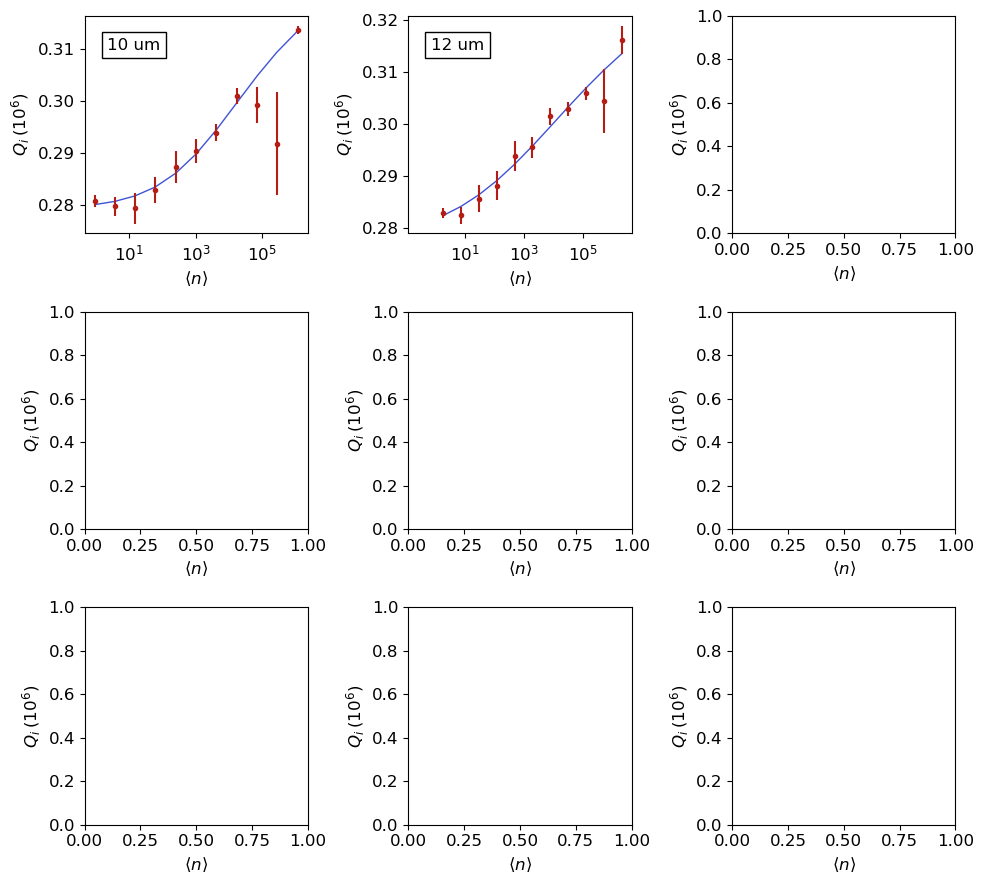

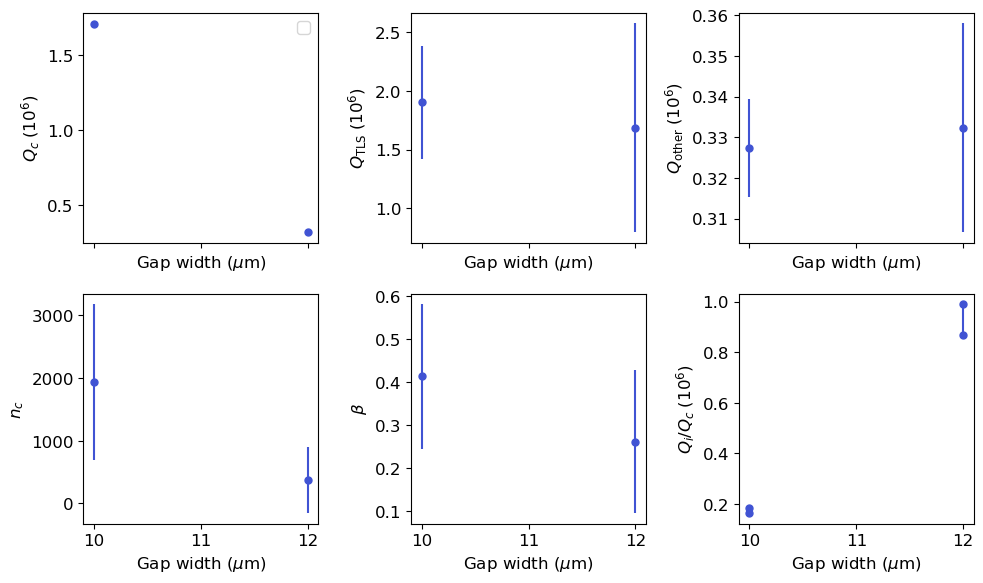

In [ ]:
if sample == 'hf3':
    max_power = [-40, -50, -35, -40, -25, -25, -25, -25]

    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    #params_nohf_low_pow = copy.deepcopy(params)
    params_hf = copy.deepcopy(params)
else:
    max_power = [-35, -35, -15, -25, -15, -15, -15, -15]
    min_power = [-115, -115, -115, -115, -100, -95, -90, -90]
    
    cfg = ana_tls.fit_qi(res_params, params, img_pth, max_power_vec = max_power, min_power_vec = min_power) 
    ana_tls.plot_res_pars([params], [''],img_pth)
    params_no_hf = copy.deepcopy(params)


### Print out info for running scans

In [ ]:
lw=[]
freq =[]
print('linewidth')
for i in range(len(params['freqs'])):
    q = 1/(1/params['qi0'][i]+1/params['qc'][i])
    lw.append(params['freqs'][i]/q)
    freq.append(params['freqs'][i])

print(np.array(lw))
print(freq)

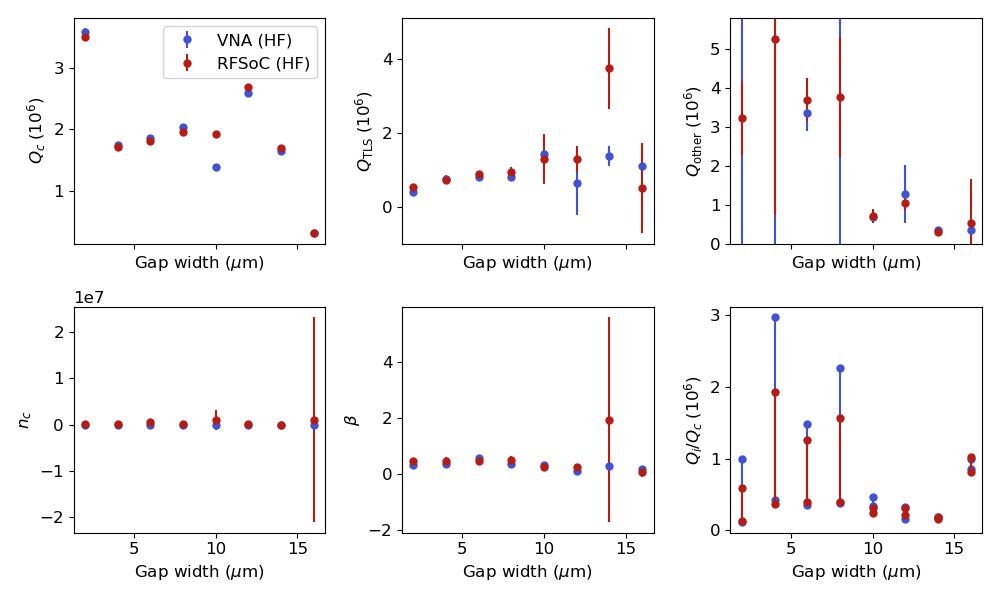

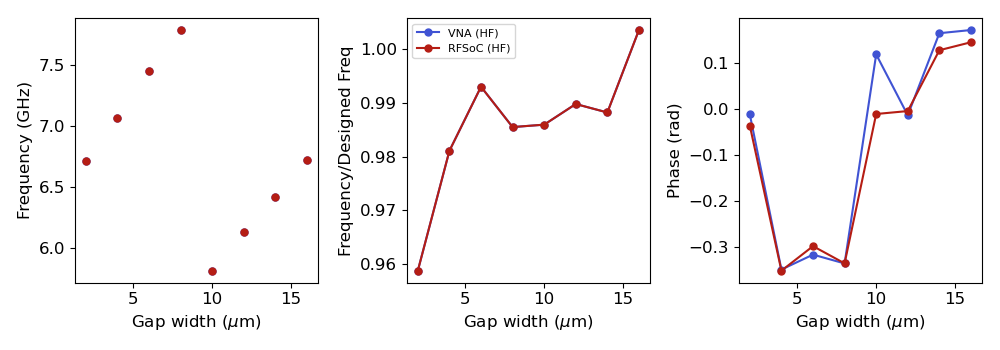

In [ ]:
%matplotlib widget
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 

#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p + '.yml'))

ana_tls.plot_res_pars(plist, labs,img_pth)
ana_res.plot_res_pars(plist, labs,img_pth)


## Single resonators

In [ ]:
# Grab list of resonators following corect format in directory. 

pattern0 = r'res_(\d+)_\d{2,3}dbm'
resonators, file_list0 = ana_res.get_resonators(directories[0],pth, pattern0)

pattern = 'res_{:d}_'.format(resonators[0]) + '(\d{2,3})dbm'
file_list = ana_res.get_resonator_power_list(pattern, file_list0)

### Fit slope for RFSoC phase correction

In [ ]:
pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240816-Resonator'

plt.figure()
data, attrs = hy.prev_data(pth, 'test2')
plt.plot(data['xpts'][0], data['phases'][0])
slope, ofs = np.polyfit(data['xpts'][0], np.unwrap(data['phases'][0]), 1)
data['phases'] = np.unwrap(data['phases'][0]) - slope * data['xpts'][0]-ofs

print(slope)

data['phases']

In [ ]:
# Grab list of resonators following corect format in directory. 

pth = r'/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/My Drive/Projects/Materials/Data/240818-Resonator/'

#directories = ['240816-Resonator/powersweep3']
directories = ['powersweep2']
pattern0 = r'res_(\d+)_\d'
resonators, file_list = ana_res.get_resonators(directories[0],pth, pattern0)

In [ ]:
file_list

In [ ]:
fname =  'res_6423_4096_wideright'
data, attrs = hy.prev_data(pth+directories[0], fname)

data.keys()

In [ ]:
data = ana_res.grab_data(pth+directories[0], file_list[4], 'soc', slope=slope)
#ana_res.plot_raw_data(data)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   

In [ ]:
sorted_file_list = sorted(file_list)
print(sorted_file_list)

In [ ]:
file_list[12]

In [ ]:
%matplotlib widget

for i in range(len(file_list)):
    #try:
    data = ana_res.grab_data(pth+directories[0], file_list[i])       
    ana_res.plot_raw_data(data)
    #output = ana_res.fit_resonator(data, file_list[i], output_path, 'png')    
    #except: 
    #    print('fit failed')  
7.714986

In [ ]:

pth = '../../../../JJ_fab/Coherence Sample/Resonators Measurement/240725/data/power_sweep5'
fname = 'res_7083855_60dbm_wide'
data = ana_res.grab_data(pth, fname)
output = ana_res.fit_resonator(data, fname, img_pth, plot=True)   
ana_res.plot_raw_data(data)

### Temp sweep

In [ ]:
# Initialize the directories list for a temperature sweep 
temps, directories = ana_res.get_temp_list(pth_base, max_temp=1500)
res_params = ana_res.analyze_sweep(directories)

ana_res.plot_power_temp(res_params,i,params,img_pth)